
1. Data source, feature type
1. Statistical description
2. Data distribution
3. Data quality issue
4. Visualization of pair of features


Import common libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections

Upload csv file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tripadvisor_hotel_reviews.csv to tripadvisor_hotel_reviews.csv


In [ ]:
reviews = pd.read_csv('tripadvisor_hotel_reviews.csv')
reviews.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


Statistical description


In [ ]:
# check missing value
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
# Rating statistic description
reviews.Rating.describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

As the statistic description of Rating shows:
The average ( or mean) is 3.95. The Median is 4. The inter-quartile range is 3 - 5 and the standard deviation is 1.23.


In [ ]:
# Review statistic description
reviews.Review.describe()

count                                                 20491
unique                                                20491
top       wonderful getaway husband couple 2 year old da...
freq                                                      1
Name: Review, dtype: object

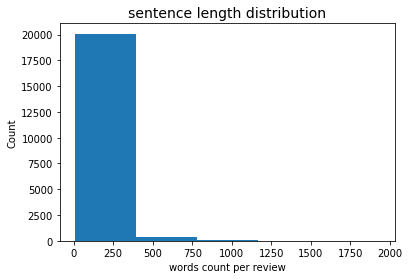

Longest sentence:  1933  words.
Shortest sentence:  9  words.


In [ ]:
length_dist = [len(x.split(" ")) for x in reviews['Review']]
# print(length_dist)
plt.hist(length_dist,bins=5)
plt.xlabel('words count per review')
plt.ylabel('Count')
plt.title('sentence length distribution', fontsize=14)
plt.show()

print('Longest sentence: ', max(length_dist)," words.")
print('Shortest sentence: ', min(length_dist)," words.")

As the statistic description of Review shows: there are 20491 instances in the dataset with no missing value and no duplicated value. The men length of reviews is 104 words, and we can see over 90% of reviews are bwteen 9 to 380 words. The longest review contain 1933 words, and the shortest review is 9 words.

Data distribution

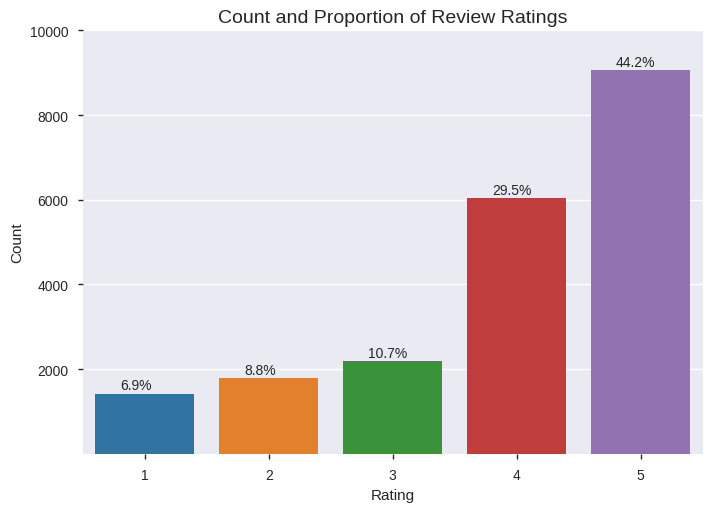

In [ ]:
# Rating data distribution

ax=sns.countplot(x = reviews.Rating)
plt.yticks([2000, 4000, 6000, 8000, 10000])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count and Proportion of Review Ratings', fontsize=14)

total = float(len(reviews.Rating)) 
# x,y = reviews.Rating.value_counts()
for i,n in enumerate(reviews.Rating.value_counts(ascending = True)):
  # print(i,n)
  percentage = '{:.1f}%'.format(n/total*100)
  i = i - 0.2
  n = n + 100
  ax.annotate(percentage,xy=(i,n))

plt.show()

The data is follow exponential distribution. As most of the people tend to give relatively good rate to hotels, but there are usually a small number of hotels got very low rate. To be specificly, 5 is the most common(44.2%) rate given by users,and the second most common rate is 4, which contributes 29.5% of the all the ratings.  

Sentence length distribution

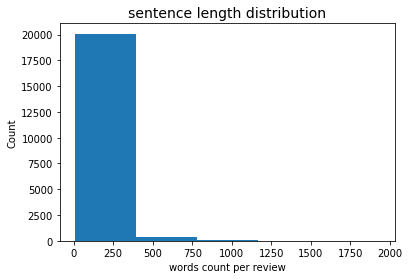

Longest sentence:  1933  words.
Shortest sentence:  9  words.


In [ ]:
length_dist = [len(x.split(" ")) for x in reviews['Review']]
# print(length_dist)
plt.hist(length_dist,bins=5)
plt.xlabel('words count per review')
plt.ylabel('Count')
plt.title('sentence length distribution', fontsize=14)
plt.show()

print('Longest sentence: ', max(length_dist)," words.")
print('Shortest sentence: ', min(length_dist)," words.")

In all the reviews in our dataset, we can see over 90% of reviews are bwteen 9 to 380 words. The longest review contain 1933 words, and the shortest review is 9 words. 

Most common words

In [ ]:
# lower words
review_all = reviews["Review"]
review_all_lower = [review.lower().split() for review in review_all]

total unique words in original reviews:  102008  words.


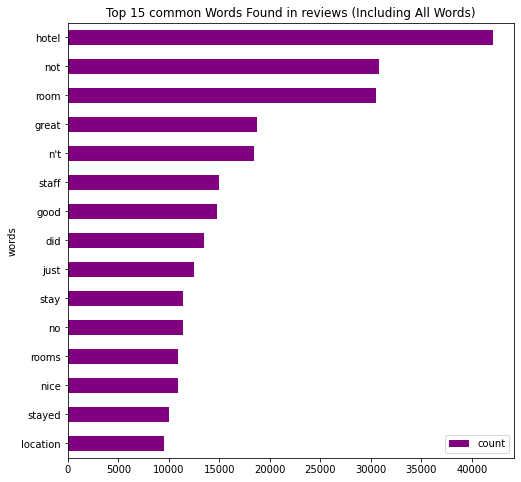

In [ ]:
from itertools import chain

# add all reviews to a list
review_all_lower_list = list(chain(*review_all_lower))
print('total unique words in original reviews: ', len(np.unique(np.array(review_all_lower_list)))," words.")

# most common words in original reviews
counts_review_list = collections.Counter(review_all_lower_list)
df_counts_review_list = pd.DataFrame(counts_review_list.most_common(15),
                             columns=['words', 'count'])


# visualize most common words in original reviews
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df_counts_review_list.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Top 15 common Words Found in reviews (Including All Words)")

plt.show()

original reviews

words needed clean: 

1.stop words

2.mannualy build collection of words don't tell us so much (too common words, irregular words, and rare words) like: hotel, n't...

3.punctuation

Review data distribution: Wordcloud

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show() 

In [ ]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


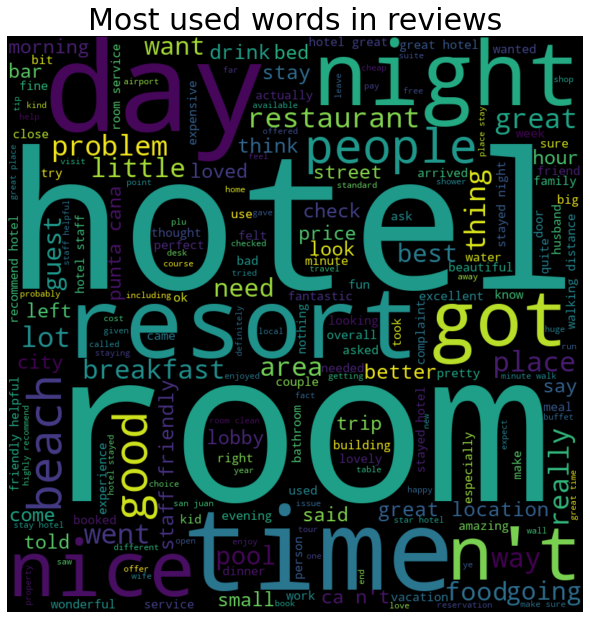

In [ ]:
wordCloud_generator(data['Review'], title="Most used words in reviews")

Data Imbalance -- using over sampling

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(reviews, reviews.Rating)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
ax=sns.countplot(x = y)
plt.yticks([2000, 4000, 6000, 8000, 10000])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count and Proportion of Review Ratings (Over Sampling)', fontsize=14)

total = float(len(X_resampled.Rating)) 
# x,y = reviews.Rating.value_counts()
for i,n in enumerate(X_resampled.Rating.value_counts(ascending = True)):
  # print(i,n)
  percentage = '{:.1f}%'.format(n/total*100)
  i = i - 0.2
  n = n + 100
  ax.annotate(percentage,xy=(i,n))

plt.show()

### Rating Prediction
It is a classfication problem. The target feature is Rating. We can use words TF-IDF and other feature extracting from reviews, like word sentiment, to predict the rating.
Model: Decision Tree, Naive Bayes, and Support Vector Classification (SVC)

Data preprocessing: 

*   remove special characters, 

*   turn words into lowercase, 

*   lemmatize the words,
*   remove stopwords(while get the tf-idf score)

Featrue extract: word count, character count, average word length, stopword count, sentiment (pos, neg, and neu)

Divide the dataset into 2 partitions: a training dataset (70%) and testing dataset (30%).

In [ ]:
from wordcloud import WordCloud
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk import word_tokenize,sent_tokenize
stops = list(stopwords.words("english"))
stops.append('hotel')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def evaluation(model, preds, test_y):
  print(model, ':')
  sns.heatmap(confusion_matrix(preds,test_y),annot=True,cmap='mako',fmt='d')
  print('Accuracy: ',accuracy_score (preds,test_y))
  print(classification_report(preds, test_y))
def stop_count(review):
  stop_c = 0
  for word in review:
    if word in stops:
      stop_c += 1
  return stop_c
def preprocessing(review):
    review=re.sub("[^a-zA-z]"," ",review) # if the char is not a word/letter, then change it to space
    review=review.lower() # turns all words into lowercase.
    review=nltk.word_tokenize(review) # splits the words that are in the sentence from each other.
    lemma=nltk.WordNetLemmatizer()
    review=[lemma.lemmatize(word) for word in review] # this code finds the root of the word for a word in the sentence and change them to their root form.
    review=" ".join(review)
    return review
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def get_pos_sentiment(review):
    sent = sid.polarity_scores(review)
    return sent['pos']
def get_neg_sentiment(review):
    sent = sid.polarity_scores(review)
    return sent['neg']
def get_neu_sentiment(review):
    sent = sid.polarity_scores(review)
    return sent['neu']

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
reviews['review_clean'] = pd.Series(reviews.Review.apply(preprocessing))
reviews['Words'] = reviews['review_clean'].apply(word_tokenize)
reviews['words_count'] = [len(i) for i in reviews.Words]
reviews['chars_count'] = [len(i) for i in reviews.review_clean]
reviews['words_length'] = reviews.chars_count / reviews.words_count
# reviews['recommend'] = [1 if i == 5 else 0 for i in reviews.Rating]
reviews['stops_count'] = reviews.Review.apply(stop_count)
reviews['pos'] = reviews.review_clean.apply(get_pos_sentiment)
reviews['neg'] = reviews.review_clean.apply(get_neg_sentiment)
reviews['neu'] = reviews.review_clean.apply(get_neu_sentiment)
reviews.head()

,Review,Rating,review_clean,Words,words_count,chars_count,words_length,stops_count,pos,neg,neu
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...",87,571,6.563218,216,0.285,0.072,0.643
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...",248,1624,6.548387,658,0.197,0.109,0.695
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experience hotel monaco seattle ...,"[nice, room, not, experience, hotel, monaco, s...",220,1357,6.168182,527,0.244,0.092,0.664
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...",91,576,6.329670,218,0.437,0.017,0.546
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...",195,1224,6.276923,470,0.271,0.098,0.631


sentiment_pos is positively correlated with rating (0.58) and sentiment_neg is negtively correlated with rating (-0.60).

word count, char count, word length, and stopword count are not significanly correlated with rating. 

In [ ]:
reviews.corr()

,Rating,words_count,chars_count,words_length,stops_count,pos,neg,neu
Rating,1.000000,-0.089711,-0.079844,0.236676,-0.085622,0.575785,-0.601517,-0.313964
words_count,-0.089711,1.000000,0.997598,-0.177120,0.995596,-0.299153,0.093955,0.307509
chars_count,-0.079844,0.997598,1.000000,-0.129102,0.998537,-0.294731,0.085574,0.307583
words_length,0.236676,-0.177120,-0.129102,1.000000,-0.126800,0.260838,-0.212779,-0.181672
stops_count,-0.085622,0.995596,0.998537,-0.126800,1.000000,-0.301802,0.089342,0.313829
pos,0.575785,-0.299153,-0.294731,0.260838,-0.301802,1.000000,-0.589667,-0.845826
neg,-0.601517,0.093955,0.085574,-0.212779,0.089342,-0.589667,1.000000,0.067924
neu,-0.313964,0.307509,0.307583,-0.181672,0.313829,-0.845826,0.067924,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(reviews[['review_clean','words_count','chars_count','words_length','pos','neg','neu']],reviews['Rating'], test_size = 0.3)


Convert the reviews to a matrix of TF-IDF features.
TF-IDF is Term Frequency -  Inverse Document Frequency. 
The aim of TF-IDF is to avoid the frequent word weight problem that the most frequently used words in a document are often the most frequently used word in all of the document.

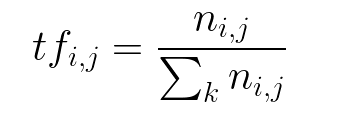
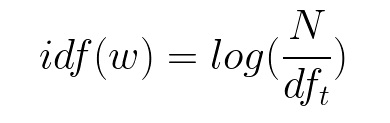
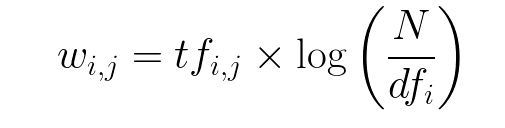

We compute the TF-IDF score for top 200 common meaningful words. The stopwords are the most frequent words, but are of very little significance. We drop all the stopwords and only get the TF-IDF score of meaningful words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#train_x,test_x,train_y,test_y = train_test_split(reviews[['words_count','chars_count','words_length']],reviews['recommend'], test_size = 0.2)
tfidf = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None, max_features = 200, stop_words = stops)
tfidf.fit(reviews["review_clean"])
x_train_vector = tfidf.transform(list(train_x.review_clean))
x_test_vector = tfidf.transform(list(test_x.review_clean))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
print(tfidf.get_feature_names())

['_', 'air', 'airport', 'amazing', 'area', 'arrived', 'ask', 'asked', 'available', 'away', 'bad', 'bar', 'bathroom', 'beach', 'beautiful', 'bed', 'best', 'better', 'big', 'bit', 'block', 'booked', 'breakfast', 'buffet', 'building', 'bus', 'business', 'ca', 'came', 'car', 'check', 'choice', 'city', 'clean', 'close', 'club', 'coffee', 'come', 'comfortable', 'couple', 'day', 'definitely', 'desk', 'different', 'dinner', 'distance', 'door', 'drink', 'early', 'easy', 'eat', 'end', 'english', 'enjoyed', 'especially', 'evening', 'excellent', 'expensive', 'experience', 'extra', 'extremely', 'family', 'fantastic', 'far', 'feel', 'felt', 'fine', 'floor', 'food', 'free', 'friend', 'friendly', 'fun', 'getting', 'going', 'good', 'got', 'great', 'guest', 'hard', 'help', 'helpful', 'high', 'highly', 'home', 'hot', 'hour', 'huge', 'husband', 'internet', 'kid', 'know', 'la', 'large', 'left', 'like', 'little', 'lobby', 'located', 'location', 'long', 'look', 'looking', 'lot', 'loved', 'lovely', 'main', 'm

Combined tf-idf features and sentiment features. 

In [ ]:
feature_names = tfidf.get_feature_names()
dense = x_train_vector.todense()
denselist = dense.tolist()
dftrain = pd.DataFrame(denselist, columns=feature_names)
dftrain['pos'] = reviews['pos']
dftrain['neg'] = reviews['neg']
dftrain['neu'] = reviews['neu']
#dftrain['ave_wl'] = reviews['words_length']

feature_names = tfidf.get_feature_names()
dense = x_test_vector.todense()
denselist = dense.tolist()
dftest = pd.DataFrame(denselist, columns=feature_names)
dftest['pos'] = reviews['pos']
dftest['neg'] = reviews['neg']
dftest['neu'] = reviews['neu']
#dftest['ave_wl'] = reviews['words_length']


For the rating data is imbalanced, we use oversampling to get balanced train data.

In [ ]:
from imblearn.over_sampling import SMOTE

train_x_b, train_y_b = SMOTE().fit_resample(x_train_vector, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Decision Tree

We first build a DT model using gini-based information gain and without max depth limitation. 
The accuracy is 0.4335.
The tree is shown below. Form the tree we can see this model is overfitting. 


Decision Tree
features: top 200 word tf-idf :
Accuracy:  0.43201040988939493
              precision    recall  f1-score   support

           1       0.33      0.34      0.33       407
           2       0.23      0.22      0.22       523
           3       0.19      0.20      0.19       642
           4       0.38      0.37      0.37      1875
           5       0.58      0.59      0.58      2701

    accuracy                           0.43      6148
   macro avg       0.34      0.34      0.34      6148
weighted avg       0.43      0.43      0.43      6148



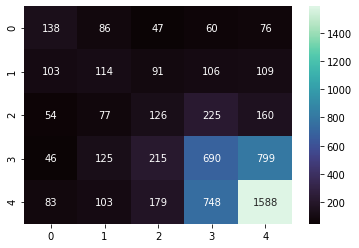

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_vector, train_y)

dt_preds = dt_model.predict(x_test_vector)
evaluation('Decision Tree\nfeatures: top 200 word tf-idf', dt_preds, test_y)

[Text(286.37606472778606, 216.02805194805194, 'X[174] <= 0.041\ngini = 0.695\nsamples = 14343\nvalue = [997, 1288, 1526, 4210, 6322]'),
 Text(251.1977208363891, 213.20415584415585, 'X[196] <= 0.092\ngini = 0.673\nsamples = 13119\nvalue = [708, 1003, 1338, 3969, 6101]'),
 Text(213.95261102800617, 210.38025974025973, 'X[56] <= 0.123\ngini = 0.695\nsamples = 11404\nvalue = [691, 978, 1272, 3575, 4888]'),
 Text(169.69870300572697, 207.55636363636364, 'X[77] <= 0.051\ngini = 0.717\nsamples = 9543\nvalue = [672, 931, 1184, 3029, 3727]'),
 Text(112.58036821020079, 204.73246753246752, 'X[127] <= 0.072\ngini = 0.77\nsamples = 4626\nvalue = [566, 682, 674, 1221, 1483]'),
 Text(93.29959163674205, 201.90857142857143, 'X[75] <= 0.003\ngini = 0.78\nsamples = 4197\nvalue = [557, 670, 647, 1130, 1193]'),
 Text(68.48661384079986, 199.08467532467532, 'X[104] <= 0.029\ngini = 0.774\nsamples = 2227\nvalue = [434, 345, 262, 446, 740]'),
 Text(63.40804628616098, 196.26077922077923, 'X[38] <= 0.032\ngini = 0

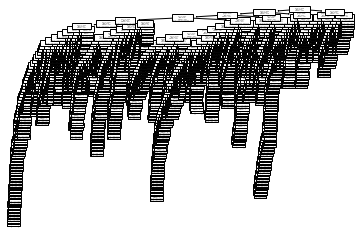

In [ ]:
from sklearn import tree
tree.plot_tree(dt_model)

We set the depth of the tree as 6 and 10.
Comparing with the DT without depth limitation, the model with depth of 6 and 10 result in a slightly higher accuracy, 0.4699 and 0.4789.

Decision Tree max_depth = 6
features: top 200 word tf-idf :
Accuracy:  0.4700715679895901
              precision    recall  f1-score   support

           1       0.17      0.38      0.23       186
           2       0.08      0.27      0.12       146
           3       0.01      0.27      0.01        15
           4       0.18      0.35      0.24       946
           5       0.90      0.50      0.65      4855

    accuracy                           0.47      6148
   macro avg       0.26      0.35      0.25      6148
weighted avg       0.74      0.47      0.56      6148



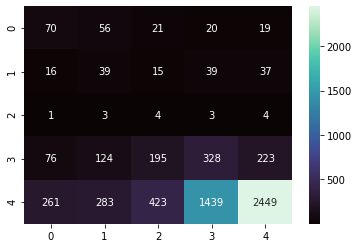

In [ ]:
dt_model6 = DecisionTreeClassifier(max_depth = 6)
dt_model6.fit(x_train_vector, train_y)
dt_preds6 = dt_model6.predict(x_test_vector)
evaluation('Decision Tree max_depth = 6\nfeatures: top 200 word tf-idf', dt_preds6, test_y)

[Text(176.04669421487603, 201.90857142857143, 'X[174] <= 0.041\ngini = 0.695\nsamples = 14343\nvalue = [997, 1288, 1526, 4210, 6322]'),
 Text(88.54214876033058, 170.84571428571428, 'X[196] <= 0.092\ngini = 0.673\nsamples = 13119\nvalue = [708, 1003, 1338, 3969, 6101]'),
 Text(44.27107438016529, 139.78285714285715, 'X[56] <= 0.123\ngini = 0.695\nsamples = 11404\nvalue = [691, 978, 1272, 3575, 4888]'),
 Text(22.135537190082644, 108.72, 'X[77] <= 0.051\ngini = 0.717\nsamples = 9543\nvalue = [672, 931, 1184, 3029, 3727]'),
 Text(11.067768595041322, 77.65714285714284, 'X[127] <= 0.072\ngini = 0.77\nsamples = 4626\nvalue = [566, 682, 674, 1221, 1483]'),
 Text(5.533884297520661, 46.59428571428572, 'X[75] <= 0.003\ngini = 0.78\nsamples = 4197\nvalue = [557, 670, 647, 1130, 1193]'),
 Text(2.7669421487603305, 15.531428571428563, 'gini = 0.774\nsamples = 2227\nvalue = [434, 345, 262, 446, 740]'),
 Text(8.300826446280992, 15.531428571428563, 'gini = 0.757\nsamples = 1970\nvalue = [123, 325, 385, 6

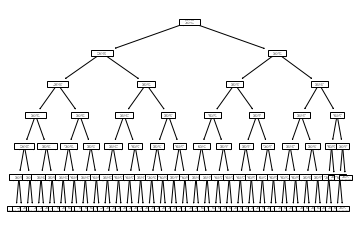

In [ ]:
tree.plot_tree(dt_model6)

Decision Tree max_depth = 10
features: top 200 word tf-idf :
Accuracy:  0.47706571242680545
              precision    recall  f1-score   support

           1       0.52      0.30      0.38       742
           2       0.10      0.28      0.14       172
           3       0.03      0.19      0.05        95
           4       0.40      0.37      0.38      1957
           5       0.70      0.60      0.65      3182

    accuracy                           0.48      6148
   macro avg       0.35      0.35      0.32      6148
weighted avg       0.56      0.48      0.51      6148



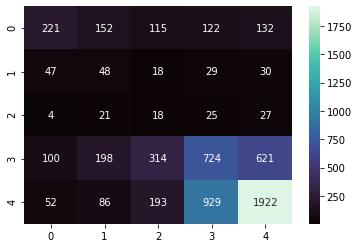

In [ ]:
dt_model10 = DecisionTreeClassifier(max_depth = 10)
dt_model10.fit(x_train_vector, train_y)
dt_preds10 = dt_model10.predict(x_test_vector)
evaluation('Decision Tree max_depth = 10\nfeatures: top 200 word tf-idf',dt_preds10, test_y)

[Text(220.64889374999998, 207.55636363636364, 'X[174] <= 0.041\ngini = 0.695\nsamples = 14343\nvalue = [997, 1288, 1526, 4210, 6322]'),
 Text(150.73846874999998, 187.7890909090909, 'X[196] <= 0.092\ngini = 0.673\nsamples = 13119\nvalue = [708, 1003, 1338, 3969, 6101]'),
 Text(100.6074, 168.0218181818182, 'X[56] <= 0.123\ngini = 0.695\nsamples = 11404\nvalue = [691, 978, 1272, 3575, 4888]'),
 Text(62.2728, 148.25454545454545, 'X[77] <= 0.051\ngini = 0.717\nsamples = 9543\nvalue = [672, 931, 1184, 3029, 3727]'),
 Text(35.9073, 128.48727272727274, 'X[127] <= 0.072\ngini = 0.77\nsamples = 4626\nvalue = [566, 682, 674, 1221, 1483]'),
 Text(18.9162, 108.72, 'X[75] <= 0.003\ngini = 0.78\nsamples = 4197\nvalue = [557, 670, 647, 1130, 1193]'),
 Text(10.2114, 88.95272727272729, 'X[104] <= 0.029\ngini = 0.774\nsamples = 2227\nvalue = [434, 345, 262, 446, 740]'),
 Text(5.3568, 69.18545454545455, 'X[38] <= 0.032\ngini = 0.783\nsamples = 2048\nvalue = [432, 342, 258, 396, 620]'),
 Text(2.6784, 49.41

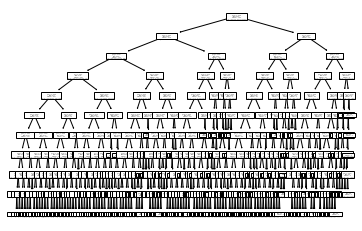

In [ ]:
tree.plot_tree(dt_model10)

We try to use the sentiment data and tf-idf data to train the DT model with max depth of 10. The tree results in slightly lower classification accuracy, 0.4770.   

Decision Tree max_depth = 10
features: top 200 word tf-idf & sentiment :
Accuracy:  0.47608978529603124
              precision    recall  f1-score   support

           1       0.52      0.30      0.38       741
           2       0.10      0.27      0.14       175
           3       0.02      0.16      0.04        89
           4       0.40      0.37      0.38      1962
           5       0.70      0.60      0.65      3181

    accuracy                           0.48      6148
   macro avg       0.35      0.34      0.32      6148
weighted avg       0.56      0.48      0.51      6148



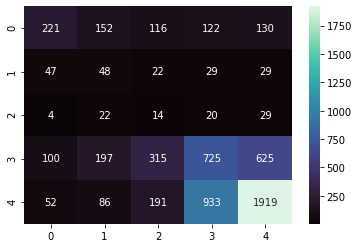

In [ ]:
dt_model = DecisionTreeClassifier(max_depth = 10)
dt_model.fit(dftrain, train_y)
dt_preds = dt_model.predict(dftest)
evaluation('Decision Tree max_depth = 10\nfeatures: top 200 word tf-idf & sentiment',dt_preds, test_y)

#### Naive Bayes
The Naive Bayes model has a better performance than DT. The accuracy is 0.5223. 

Naive Bayes
features: top 200 word tf-idf :
Accuracy:  0.5222836694860117
              precision    recall  f1-score   support

           1       0.65      0.47      0.54       589
           2       0.36      0.23      0.28       813
           3       0.38      0.29      0.33       856
           4       0.44      0.49      0.46      1643
           5       0.62      0.76      0.68      2247

    accuracy                           0.52      6148
   macro avg       0.49      0.45      0.46      6148
weighted avg       0.51      0.52      0.51      6148



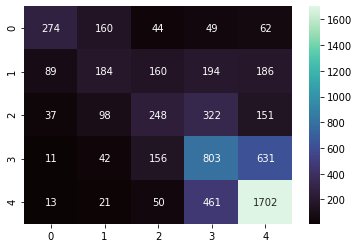

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(train_x_b.toarray(), train_y_b)
nb_preds = nb_model.predict(x_test_vector.toarray())
evaluation('Naive Bayes\nfeatures: top 200 word tf-idf',nb_preds, test_y)

Naive Bayes
 features: word tf-idf & sentiment :
Accuracy:  0.5058555627846454
              precision    recall  f1-score   support

           1       0.14      0.66      0.24        92
           2       0.07      0.41      0.12        82
           3       0.01      0.78      0.02         9
           4       0.21      0.44      0.28       857
           5       0.96      0.52      0.67      5108

    accuracy                           0.51      6148
   macro avg       0.28      0.56      0.27      6148
weighted avg       0.83      0.51      0.60      6148



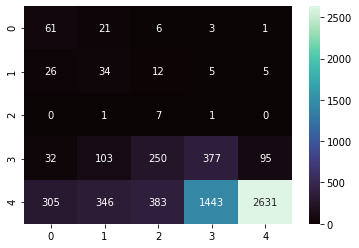

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(dftrain, train_y)
nb_preds = nb_model.predict(dftest)
evaluation('Naive Bayes\nfeatures: top 200 word tf-idf & sentiment',nb_preds, test_y)

#### SVC
The SVC model has a better performance than DT and NB. 

SVC
features: top 200 word tf-idf :
Accuracy:  0.5801886792452831
              precision    recall  f1-score   support

           1       0.52      0.58      0.55       383
           2       0.32      0.34      0.33       480
           3       0.14      0.43      0.21       212
           4       0.48      0.50      0.49      1762
           5       0.81      0.67      0.73      3311

    accuracy                           0.58      6148
   macro avg       0.45      0.50      0.46      6148
weighted avg       0.64      0.58      0.60      6148



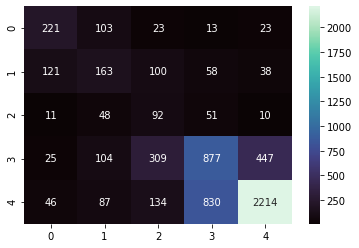

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train_vector, train_y)
svc_preds = svc_model.predict(x_test_vector)
evaluation('SVC\nfeatures: top 200 word tf-idf', svc_preds, test_y)

The accuracy of SVC with linear kernel is 0.5804.


SVC
features: top 200 word tf-idf :
Accuracy:  0.5803513337670787
              precision    recall  f1-score   support

           1       0.59      0.56      0.58       442
           2       0.33      0.35      0.34       479
           3       0.14      0.43      0.21       215
           4       0.48      0.49      0.49      1800
           5       0.80      0.68      0.73      3212

    accuracy                           0.58      6148
   macro avg       0.47      0.50      0.47      6148
weighted avg       0.63      0.58      0.60      6148



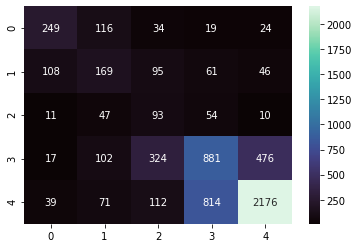

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear')
svc_model.fit(x_train_vector, train_y)
svc_preds = svc_model.predict(x_test_vector)
evaluation('SVC\nfeatures: top 200 word tf-idf', svc_preds, test_y)

SVC
features: top 200 word tf-idf & sentiment :
Accuracy:  0.5816525699414443
              precision    recall  f1-score   support

           1       0.54      0.58      0.56       396
           2       0.34      0.36      0.35       477
           3       0.13      0.46      0.21       193
           4       0.48      0.49      0.49      1786
           5       0.81      0.67      0.73      3296

    accuracy                           0.58      6148
   macro avg       0.46      0.51      0.47      6148
weighted avg       0.64      0.58      0.60      6148



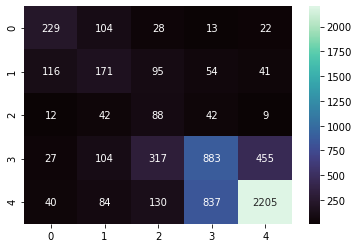

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(dftrain, train_y)
svc_preds = svc_model.predict(dftest)
evaluation('SVC\nfeatures: top 200 word tf-idf & sentiment', svc_preds, test_y)